# Active Learning Experiment Script

Store the demonstration query data in `./Data` folder. Set the path to the data and output folders from `params.py`.

In [1]:
from DemoScript import *
import matplotlib
import active_params as params
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [20,10]

import warnings
warnings.filterwarnings("ignore") 

First read the raw data and store only the points where proposition changes were observed

In [2]:
params.nTraj = 2
raw_data = read_raw_data(params.raw_data_path)
compressed_data = compress_data(raw_data)
write_data(params.compressed_data_path, compressed_data)
params.nSamples = 20000
params.nBurn = 500

## Batch Inference

In [3]:

infer_command = f'webppl batch_bsi.js --require webppl-json --require webppl-fs -- --nSamples {params.nSamples}  --nBurn {params.nBurn} --dataPath \'{params.compressed_data_path}\' --outPath \'{params.output_path}\' --nTraj {params.nTraj}'
returnval = os.system(infer_command)
if returnval: Exception('Inference Failure')
print(infer_command)

webppl batch_bsi.js --require webppl-json --require webppl-fs -- --nSamples 20000  --nBurn 500 --dataPath 'Active_Data/CompressedData' --outPath 'Active_Distributions' --nTraj 2


Compile a PUnS MDP and train a policy for the MDP with Q-learning

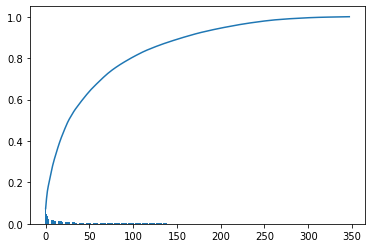

In [4]:
spec_file = os.path.join(params.output_path, 'batch_posterior.json')
MDP = CreateSpecMDP(spec_file, n_threats=0, n_waypoints=5)

Determine what the terminal state rewards are and plot the terminal state rewards in ascending order

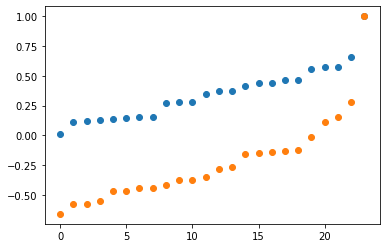

In [5]:
specification_fsm = MDP.specification_fsm
rewards = [specification_fsm.reward_function(state) for state in specification_fsm.terminal_states]
plt.plot(np.sort(np.abs(rewards)),'o')
plt.plot(np.sort(rewards),'o')


## Query 1

Training episode 4999         

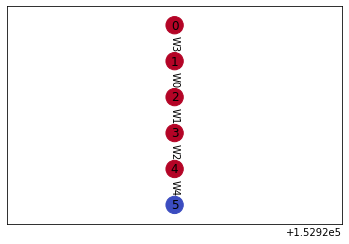

In [6]:
query1 = create_active_query(MDP, verbose = True)

In [7]:
label = True
new_traj = create_query_demo(query1['trace'])
write_demo_query_data(new_traj, label, params.compressed_data_path, query_number = 1)

Writing file: query_1.json


**Update the distribution**

In [8]:
infer_command = f'webppl active_bsi.js --require webppl-json --require webppl-fs -- --nSamples {params.nSamples}  --nBurn {params.nBurn} --dataPath \'{params.compressed_data_path}\' --outPath \'{params.output_path}\' --nQuery 1'
returnval = os.system(infer_command)
if returnval: Exception('Inference Failure')
print(infer_command)

webppl active_bsi.js --require webppl-json --require webppl-fs -- --nSamples 20000  --nBurn 500 --dataPath 'Active_Data/CompressedData' --outPath 'Active_Distributions' --nQuery 1


**Plot the updated distribution and reward function**

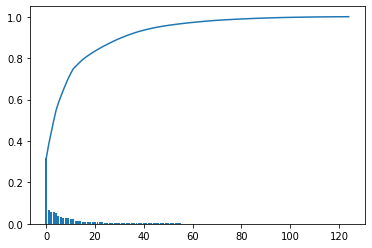

In [9]:
spec_file = os.path.join(params.output_path, 'batch_posterior.json')
MDP = CreateSpecMDP(spec_file, n_threats=0, n_waypoints=5)

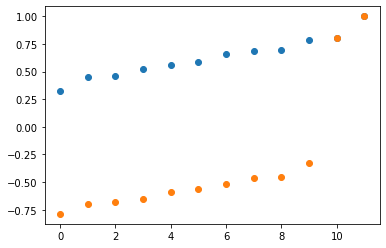

In [10]:
rewards = [MDP.specification_fsm.reward_function(state) for state in MDP.specification_fsm.terminal_states]
plt.plot(np.sort(np.abs(rewards)),'o')
plt.plot(np.sort(rewards),'o')

## Query 2

Training episode 4999         

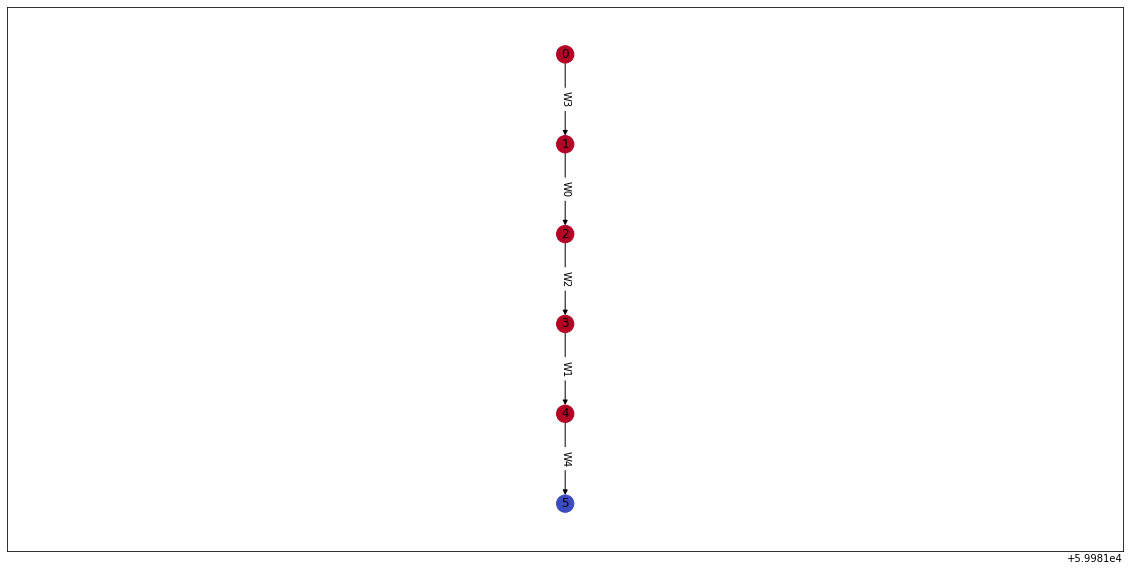

In [15]:
query2 = create_active_query(MDP, verbose = True)

In [ ]:
label = True
new_traj = create_query_demo(query2['trace'])
write_demo_query_data(new_traj, label, params.compressed_data_path, query_number = 2)

**Update the distribution**

In [ ]:
infer_command = f'webppl active_bsi.js --require webppl-json --require webppl-fs -- --nSamples {params.nSamples}  --nBurn {params.nBurn} --dataPath \'{params.compressed_data_path}\' --outPath \'{params.output_path}\' --nQuery 2'
returnval = os.system(infer_command)
if returnval: Exception('Inference Failure')
print(infer_command)

In [ ]:
spec_file = os.path.join(params.output_path, 'batch_posterior.json')
MDP = CreateSpecMDP(spec_file, n_threats=0, n_waypoints=5)

In [ ]:
MDP.specification_fsm._formulas[25]

In [ ]:
rewards = [MDP.specification_fsm.reward_function(state) for state in MDP.specification_fsm.terminal_states]
plt.plot(np.sort(np.abs(rewards)),'o')
plt.plot(np.sort(rewards),'o')

## Query 3

In [ ]:
query3 = create_active_query(MDP, verbose = True)

In [ ]:
label = False
new_traj = create_query_demo(query3['trace'])
write_demo_query_data(new_traj, label, params.compressed_data_path, query_number = 3)

In [ ]:
infer_command = f'webppl active_bsi.js --require webppl-json --require webppl-fs -- --nSamples {params.nSamples}  --nBurn {params.nBurn} --dataPath \'{params.compressed_data_path}\' --outPath \'{params.output_path}\' --nQuery 3'
returnval = os.system(infer_command)
if returnval: Exception('Inference Failure')
print(infer_command)

**This is the final posterior**

In [ ]:
spec_file = os.path.join(params.output_path, 'batch_posterior.json')
MDP = CreateSpecMDP(spec_file, n_threats=0, n_waypoints=5)

In [ ]:
MDP.specification_fsm.visualize(colormap='terminal')

## Generating Final Plan